In [2714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2715]:
df=pd.read_csv('data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [2716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [2717]:
df['sqft_above']=df['sqft_above'].astype('float')
df['sqft_basement']=df['sqft_basement'].astype('float')
df['sqft_lot']=df['sqft_lot'].astype('float')
df['sqft_living']=df['sqft_living'].astype('int')
df['bedrooms']=df['bedrooms'].astype('int')
df['bathrooms']=df['bathrooms'].astype('int')
df['floors']=df['floors'].astype('int')

In [2718]:
df['date']=pd.to_datetime(df['date'])

In [2719]:
df['month']=df['date'].dt.month
df['month']

0       5
1       5
2       5
3       5
4       5
       ..
4595    7
4596    7
4597    7
4598    7
4599    7
Name: month, Length: 4600, dtype: int32

In [2720]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int32
bathrooms                 int32
sqft_living               int32
sqft_lot                float64
floors                    int32
waterfront                int64
view                      int64
condition                 int64
sqft_above              float64
sqft_basement           float64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
month                     int32
dtype: object

In [2721]:
city_count=df['city'].value_counts()
rare_cities=city_count[city_count<10].index
df['city']=df['city'].replace(rare_cities,"Others")

In [2722]:
zip_count=df['statezip'].value_counts()
rare_zip=zip_count[zip_count<10].index
df['statezip']=df['statezip'].replace(rare_zip,"Others")

In [2723]:
df=pd.get_dummies(df,columns=['city','statezip'],drop_first=True)

In [2724]:
df.drop(['date','street','country'],axis=1,inplace=True)

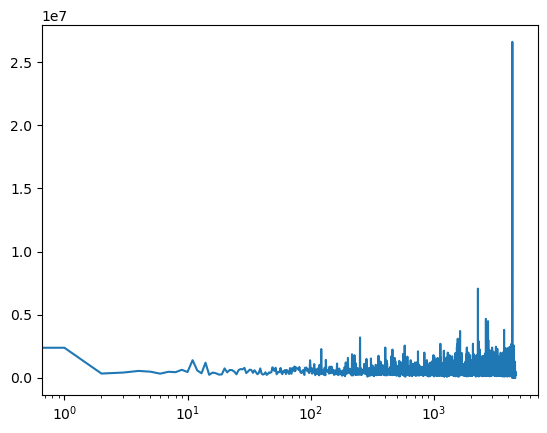

In [2725]:
plt.semilogx(df['price'])

In [2726]:
df=df[df['price']>1000]

<Axes: ylabel='price'>

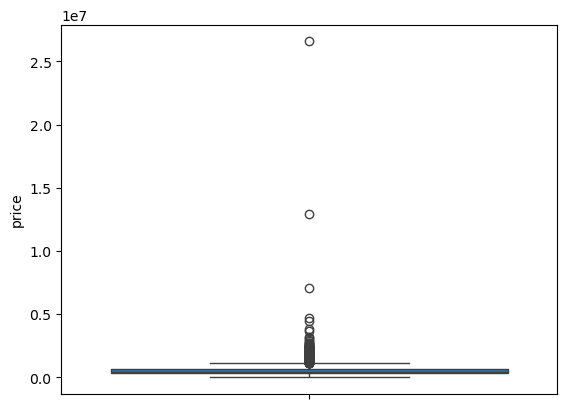

In [2727]:
sns.boxplot(data=df,y='price')

In [2728]:
df['price'].describe()

count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64

In [2729]:
for i in df.columns:
    if df[i].dtype=='float64':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df= df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]


<Axes: ylabel='price'>

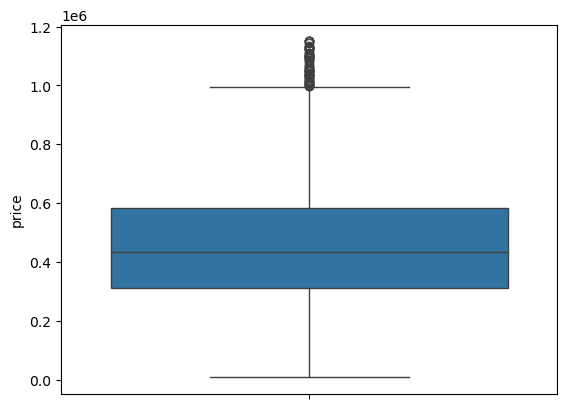

In [2730]:
sns.boxplot(df['price'])

C:\Users\alvin\AppData\Local\Temp\ipykernel_93044\1837564413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


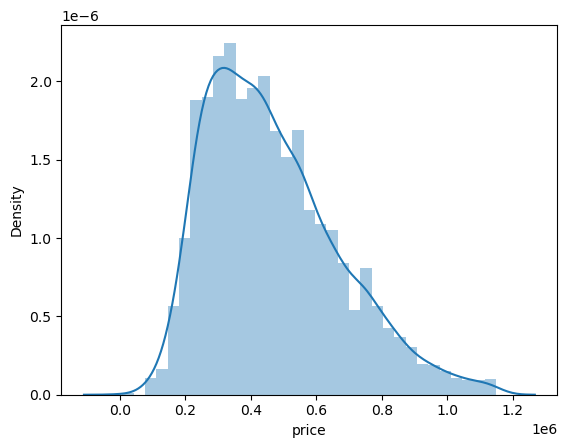

C:\Users\alvin\AppData\Local\Temp\ipykernel_93044\1837564413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


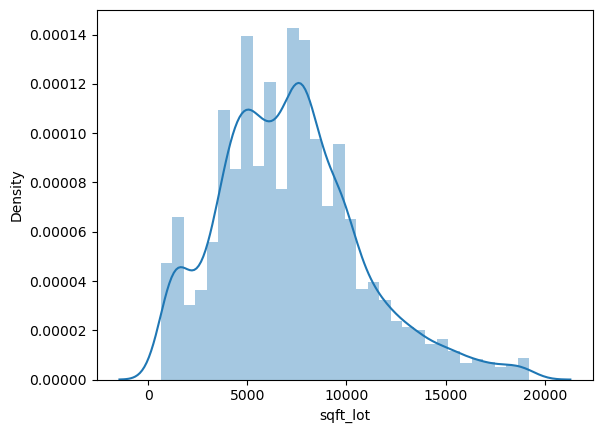

C:\Users\alvin\AppData\Local\Temp\ipykernel_93044\1837564413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


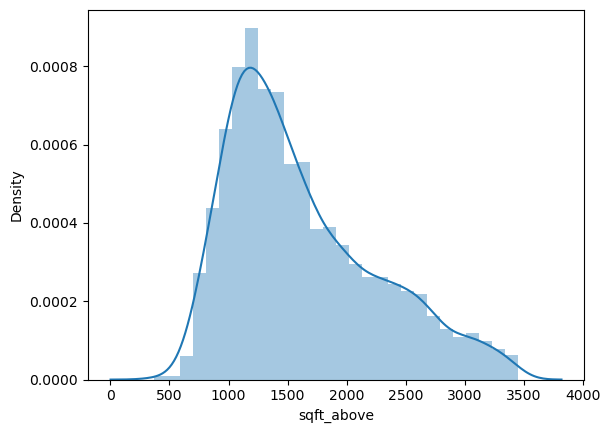

C:\Users\alvin\AppData\Local\Temp\ipykernel_93044\1837564413.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])


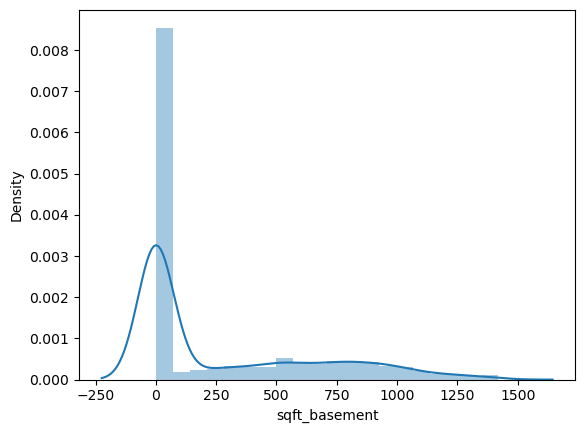

In [2731]:
for i in df.columns:
    if df[i].dtype=='float64':
        sns.distplot(df[i])
        plt.show()


In [2732]:
from scipy.stats import normaltest

In [2733]:
normaltest(df['price'])

NormaltestResult(statistic=299.8295427248164, pvalue=7.813435682092368e-66)

In [2734]:
df['price']=np.cbrt(df['price'])

C:\Users\alvin\AppData\Local\Temp\ipykernel_93044\2461166202.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


NormaltestResult(statistic=23.266794931202675, pvalue=8.865019084918476e-06)


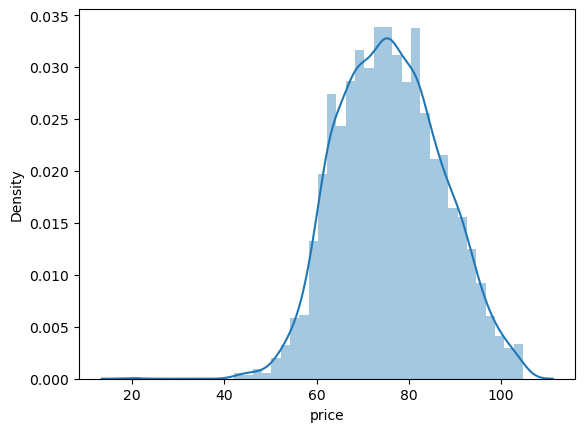

In [2735]:
sns.distplot(df['price'])
print(normaltest(df['price']))

In [2736]:
normaltest(df['price'])

NormaltestResult(statistic=23.266794931202675, pvalue=8.865019084918476e-06)

In [2737]:
df['price'].describe()

count    3692.000000
mean       75.945080
std        11.128552
min        19.831925
25%        67.672262
50%        75.653548
75%        83.634466
max       104.768955
Name: price, dtype: float64

In [2741]:
num_cols=df.select_dtypes(include='number')
cat_cols=df.select_dtypes(include='object')

In [2742]:
corr=num_cols.corr()
corr['price'].sort_values()

yr_renovated    -0.069435
sqft_lot        -0.041347
yr_built         0.009820
month            0.026026
waterfront       0.065537
condition        0.083350
view             0.211028
floors           0.230106
sqft_basement    0.253342
bedrooms         0.273693
bathrooms        0.373130
sqft_above       0.459423
sqft_living      0.580239
price            1.000000
Name: price, dtype: float64

<Axes: >

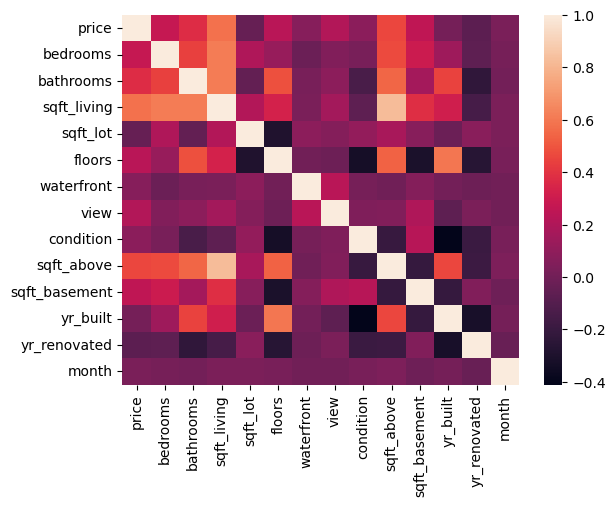

In [2743]:
sns.heatmap(corr)

In [2744]:
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,month
price,1.000000,0.273693,0.373130,0.580239,-0.041347,0.230106,0.065537,0.211028,0.083350,0.459423,0.253342,0.009820,-0.069435,0.026026
bedrooms,0.273693,1.000000,0.438983,0.613584,0.196169,0.121547,-0.021166,0.046885,0.020225,0.467548,0.297933,0.144493,-0.065614,0.016511
bathrooms,0.373130,0.438983,1.000000,0.609887,-0.051276,0.486290,0.019378,0.089336,-0.138223,0.543003,0.167522,0.447667,-0.232062,0.007422
sqft_living,0.580239,0.613584,0.609887,1.000000,0.209342,0.329034,0.028462,0.160042,-0.065989,0.826451,0.379648,0.315050,-0.147944,0.032001
sqft_lot,-0.041347,0.196169,-0.051276,0.209342,1.000000,-0.294385,0.086926,0.058707,0.109221,0.176778,0.073286,-0.024238,0.078522,0.035666
floors,0.230106,0.121547,0.486290,0.329034,-0.294385,1.000000,-0.002278,-0.014163,-0.327956,0.536876,-0.310439,0.596030,-0.265807,0.020363
waterfront,0.065537,-0.021166,0.019378,0.028462,0.086926,-0.002278,1.000000,0.230811,0.018964,-0.006581,0.060272,0.005842,-0.015727,0.002248
view,0.211028,0.046885,0.089336,0.160042,0.058707,-0.014163,0.230811,1.000000,0.044571,0.049557,0.196667,-0.064719,0.033689,-0.001953
condition,0.083350,0.020225,-0.138223,-0.065989,0.109221,-0.327956,0.018964,0.044571,1.000000,-0.206674,0.224939,-0.410582,-0.192256,0.019476
sqft_above,0.459423,0.467548,0.543003,0.826451,0.176778,0.536876,-0.006581,0.049557,-0.206674,1.000000,-0.207096,0.459467,-0.188242,0.038938


In [2745]:
df['ratio_above_vs_basement']=(df['sqft_living']/df['sqft_above'])/(df['sqft_living']/df['sqft_basement'])


In [2746]:
df['yr_renovated'] = [built if renovated == 0 else renovated for renovated, built in zip(df['yr_renovated'], df['yr_built'])]


In [2747]:
y=df['price']
X=df.drop(['price','yr_built','month'],axis=1)


In [2748]:
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from  sklearn.pipeline import Pipeline


In [2749]:
estimator = Pipeline([('scaler',StandardScaler()),
                      ('ridge_regression',Ridge(max_iter=100000))])
params={'ridge_regression__alpha':np.geomspace(0.000000001,1,10)}

In [2750]:

kf=KFold(n_splits=4,shuffle=True)

In [2751]:
grid=GridSearchCV(estimator,params,cv=kf)
grid.fit(X,y)

GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge_regression',
                                        Ridge(max_iter=100000))]),
             param_grid={'ridge_regression__alpha': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00])})

In [2752]:
grid.best_score_,grid.best_params_

(0.7994274970806371, {'ridge_regression__alpha': 1.0})

In [2753]:
pred=grid.predict(X)

In [2754]:
og_pred=pred**3
og_y=y**3

In [2755]:
from sklearn.metrics import r2_score

r2_score(og_y,og_pred)

0.8032308050387185

In [2756]:
grid.best_estimator_.named_steps['ridge_regression'].coef_

array([-0.32718932,  0.32003591,  3.12806566,  0.41346496, -0.32439952,
        0.52143237,  1.19874925,  1.00443979,  3.1476876 ,  0.2632779 ,
        0.23680274,  3.08660068,  0.19468708,  0.47843089, -0.0048862 ,
        0.40486705, -0.40039956,  0.60855866, -0.04104716, -0.22871124,
        0.01644076, -0.08941664,  0.80298839,  0.2233576 , -0.57574999,
       -0.06875911,  0.29560421, -0.29989656,  0.        ,  0.83067053,
        0.48293208,  0.44707754,  0.02452092, -0.17063553,  1.08863362,
       -0.31733395,  0.70356099,  0.26205394,  2.42779347,  0.19124425,
        0.17765996,  0.16489701, -0.06972624,  0.23680652, -0.90302432,
       -0.77149478, -0.60489583,  0.71403157,  0.02127771, -0.47000967,
       -0.30128184, -0.5116516 ,  0.18802224, -0.0048862 , -0.04104716,
       -0.22871124, -0.97819438,  0.01644076,  0.43134645,  0.22863832,
        0.76048674, -0.37536733, -0.28456206, -0.35408558,  1.59985673,
        1.03400067, -0.29989656,  0.        ,  0.83067053, -0.39